In [35]:
import glob
import csv
import os
from tsne import bh_sne
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [2]:
flist = glob.glob("train/*.bytes")

In [3]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [4]:
flist

['train/2jf7mkt8YCUM3AriKVas.bytes',
 'train/3oMQAPEXqKpiBlHvOJYz.bytes',
 'train/AxMQBldJRotHf69j32PG.bytes',
 'train/27o93DUCHcGPXdTxlNwg.bytes',
 'train/kaz4GujLsES3IDtnXc10.bytes',
 'train/9gBVZNKoIPkFM8vOp45G.bytes',
 'train/jvGIm6Yu2XKcE8hr4gMy.bytes',
 'train/aZKEkJF7CQtNSDf64d0P.bytes',
 'train/7cA9IVu3YOH5r8hK42wD.bytes',
 'train/3ftwoRhscPpNCxdlIbrU.bytes',
 'train/hGrRVejLFzNtXcBW6s2p.bytes',
 'train/5fsyaH409vx3SUXN2jOq.bytes',
 'train/7RVrih9gAL1FodIKNTc2.bytes',
 'train/l3iRBsCVb4Z81TLNxSgM.bytes',
 'train/HZI8SimVhNLz1JD5fbyW.bytes',
 'train/hrMLJ7DFIfmUGPB2q8y1.bytes',
 'train/DkNYd806tFbgoJ4zf1UA.bytes',
 'train/je3Im0RAozk8M7gnlXiO.bytes',
 'train/i5XIeh8WyrO79NklcwBJ.bytes',
 'train/gPUaRd12vzpH7lkV5DhG.bytes',
 'train/FalYuVzr8LgtiKRZ9oEy.bytes',
 'train/JVdaIxt2DBu8Ez0cH5gY.bytes',
 'train/IBEoqZCidDj8LlUGg6u9.bytes',
 'train/aM4JPZrzBXhgSCF8UTVb.bytes',
 'train/4BrHgYquho9skZMR06ea.bytes',
 'train/3k1meX0gV2WMjAvGDrCq.bytes',
 'train/dZv5FgTBxasz7GMhKRSL.bytes',
 

In [5]:
vectorizer = CountVectorizer(input='filename', stop_words=None, token_pattern=r'\b\w\w\b', min_df=1)

In [6]:
X = vectorizer.fit_transform(flist)

In [7]:
X = X.todense()

In [8]:
X

matrix([[ 11315,   5488,   3274, ...,   3184,   3147,   7192],
        [ 14410,   8332,   6040, ...,   6084,   6171,   9685],
        [ 43549,   9898,   9297, ...,    389,   8051,  55549],
        ..., 
        [  6528,   1146,   1115, ...,   1111,   1132,   1221],
        [633137,   5270,   3281, ...,   3250,   2911,   4864],
        [ 17820,    844,    578, ...,    329,    386,   2160]], dtype=int64)

In [9]:
X.shape

(10868, 256)

In [25]:
file1gram = "Microsoft-byte1gram.npy"
np.save(file1gram,X)

In [10]:
trainLabelFile = "trainLabels.csv"

In [11]:
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))

In [12]:
labelDict

{'1ZYtDkrdm9yVLpeU5cSJ': '3',
 'GKL3rD2YSf9xiXIPzeb6': '9',
 'eKgQl0AwEzo12DBcs46I': '8',
 '6TcBvxAgWEJNjLeGPoQi': '1',
 '9jOk8Tn5JMt4qcXmplfx': '6',
 'cTt7qy0B8upDkdwJ5g6h': '3',
 'gutpXNfdSFbzG9wB7KM1': '9',
 '65cijV9z78ZBfqC3Kgbw': '2',
 '59VQlWze1hj3oRLwcm0H': '6',
 'AqYZlKV8H579cfpjFODJ': '2',
 '6A1oSFjghKeHmz9VUJ3u': '6',
 'Ce3k2BNVSYobKq5zGTtI': '9',
 'jAVrC4FvT9kpaIEY0woP': '6',
 'gRZ9nxcONPftvzDCyKTQ': '4',
 'dluf0IQLY1Sym2pzta8M': '3',
 'HqwX8R5sQb1oVB3uD67O': '7',
 'H3teMfnQ1LGR5Sjr4p7W': '2',
 'fRGWEv9TLIUOnhj0YV35': '1',
 'blhHt3mGR6pFC0Or41SL': '3',
 'D34oHsTMkn7vaOWFQUy8': '6',
 'e1RMvSd83AgaCQY4PT2u': '1',
 '4Bsbdx8uXvtMOqHnyYfi': '3',
 'GFdy1EXBLj6k4ceIfvOA': '3',
 'CPu0ovHSWi18aLz62pBF': '2',
 'ahd8btPYH6uW7QkqesEB': '1',
 'dIUsC2eFoGQ05ifjtn3R': '3',
 '38MtDCdfSEF7BWhizVyL': '2',
 'dw4J9DBiagtKMGo25N3E': '9',
 'ATr6NemOyI2KF0w48BR5': '3',
 '7tDpNPXUISleJCkZQjr9': '8',
 'BkV8KZjcfSy3DFa5MYre': '2',
 'E03uAYZpmXyiCSB9Rrwj': '2',
 'k3vrzKCeduVIEYyfAhRx': '1',
 'BG4gJuDj

In [13]:
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 2jf7mkt8YCUM3AriKVas - Class: 3
File: 3oMQAPEXqKpiBlHvOJYz - Class: 3
File: AxMQBldJRotHf69j32PG - Class: 2
File: 27o93DUCHcGPXdTxlNwg - Class: 3
File: kaz4GujLsES3IDtnXc10 - Class: 1
File: 9gBVZNKoIPkFM8vOp45G - Class: 2
File: jvGIm6Yu2XKcE8hr4gMy - Class: 3
File: aZKEkJF7CQtNSDf64d0P - Class: 4
File: 7cA9IVu3YOH5r8hK42wD - Class: 9
File: 3ftwoRhscPpNCxdlIbrU - Class: 2
File: hGrRVejLFzNtXcBW6s2p - Class: 8
File: 5fsyaH409vx3SUXN2jOq - Class: 8
File: 7RVrih9gAL1FodIKNTc2 - Class: 1
File: l3iRBsCVb4Z81TLNxSgM - Class: 4
File: HZI8SimVhNLz1JD5fbyW - Class: 9
File: hrMLJ7DFIfmUGPB2q8y1 - Class: 1
File: DkNYd806tFbgoJ4zf1UA - Class: 8
File: je3Im0RAozk8M7gnlXiO - Class: 2
File: i5XIeh8WyrO79NklcwBJ - Class: 1
File: gPUaRd12vzpH7lkV5DhG - Class: 3
File: FalYuVzr8LgtiKRZ9oEy - Class: 2
File: JVdaIxt2DBu8Ez0cH5gY - Class: 6
File: IBEoqZCidDj8LlUGg6u9 - Class: 3
File: aM4JPZrzBXhgSCF8UTVb - Class: 1
File: 4BrHgYquho9skZMR06ea - Class: 3
File: 3k1meX0gV2WMjAvGDrCq - Class: 3
File: dZv5Fg

File: hcpZW5LfIklq0gCJsYTP - Class: 3
File: Fu6jQNrclwCs38MSZKUx - Class: 6
File: k8cgAnvaEsdSCOxFPoQ2 - Class: 2
File: GkQctIpwN58dSs4O7UhY - Class: 9
File: hJO6AGKpk2U1PqiX97cr - Class: 1
File: K4hfUQFEiTBqIPauRYdp - Class: 2
File: ABGeDjKUirlfFwcoMQ5V - Class: 2
File: 4qvPNwKnEOg8R1m6z3ZY - Class: 6
File: L1OGj5BEh2drf0Wtiu9N - Class: 7
File: 2bdEFfrZnB04XGIDig3t - Class: 6
File: 9bx5RUkH6CZzoS7OXmIY - Class: 9
File: Ijgzo3ts4kZ9UQ7h2nYd - Class: 3
File: 1vuJenm9cg2EtkNBwOUo - Class: 3
File: fLUpvqmYE2OskXAB8jJW - Class: 6
File: Gysrvz2mYQ9KOtJHP4T3 - Class: 9
File: hsU2gaFmPKli7CzWdqtj - Class: 8
File: 93prvATOY7WiulSKUcRm - Class: 9
File: hnEAVHz5I7tQcjGWvRi1 - Class: 2
File: iF5AvoV9uKdhEeS7msYt - Class: 2
File: IJVGstw6jylqvRrkMocZ - Class: 3
File: Fx7qZU0yclOobRHp21kN - Class: 9
File: eNuFU10Chsn7dmbEvWax - Class: 1
File: hP6lGov9R0eVci5QyuYS - Class: 8
File: CxU4nQhjq7vPAYH2uOyr - Class: 4
File: iH6v0dnEp7RDSGh2VuCZ - Class: 3
File: Hp1fY2tRvjFEolKkxnW4 - Class: 1
File: ieTyx3

File: EKmgShQsf6a9vY0znNlU - Class: 4
File: hL5VPA4jfzHRWusCaQi0 - Class: 2
File: 1S9ui2XqltCJAOGUPw7v - Class: 4
File: GZMUBgvzt3brcfsh84iR - Class: 8
File: 4JlgupTC2XdIvxE1oHjq - Class: 6
File: 0xLRN4DuvoCGbjIFQKYB - Class: 3
File: jta5QoJ6BOMDnvhIu2Uq - Class: 8
File: D34oHsTMkn7vaOWFQUy8 - Class: 6
File: idINaACF1etphXJy3nSr - Class: 2
File: jxgaANiB20rR4UuSveCs - Class: 8
File: hascDlfInApRdyZVFm1o - Class: 1
File: cVRzrh9IeJpAw2m4oyjB - Class: 9
File: 5euYnhWJHK13wq4VgdcL - Class: 3
File: cgASXYyjTORWDEGnlZV3 - Class: 2
File: 0FdOaDWrfBU6TqwCRYxA - Class: 3
File: dRaB2bOfylYED4WeFzIK - Class: 3
File: 8zYrtD6gFwnQT3EvpUsm - Class: 2
File: dPbyaqnosDguVcFBJLXT - Class: 3
File: bazOp8SLuGgisveCP0QI - Class: 3
File: jqh5tdZW7RfngvkY4B0U - Class: 3
File: 6qwhD5Z3bsdFkyAzgxQ0 - Class: 3
File: 31KjQiNWATfPaozHtYOl - Class: 1
File: C9YJUvOwLcdK3TWa0mb8 - Class: 8
File: iEhMwSYF4f7O6clnzgv0 - Class: 1
File: DuejROmZzVTIyQi1rAF9 - Class: 1
File: ihtV7FB5cXINJnSzflvO - Class: 2
File: FlMyrL

File: j514c8CPoS9fIyKmnOaH - Class: 9
File: Ccw0Ub4P6y8ARuM2FihB - Class: 2
File: 8tAWCdvzYj7s2G3Ol5Hu - Class: 2
File: 7FmNSjrBDkVI8g21bHpC - Class: 3
File: 56KhNHUTXZpryYaGqoj4 - Class: 8
File: KCIYcrW1ExdiuljgTMZ3 - Class: 2
File: eFka3xfN4HWyIA1JGuvs - Class: 3
File: 54sFSWh1V8P07qugyLwo - Class: 2
File: bkRlwrQS1pVG50DaIgKN - Class: 1
File: I9yrDjPY4kMqU8czFRmv - Class: 6
File: jP3pSWqTDOEnCcgH7d0w - Class: 8
File: IR9X4vYJ6OkpueVC5gN7 - Class: 9
File: 6OtViL80ylEW5ogaUH7m - Class: 3
File: HtmVeG1qSNXLglF9vDyk - Class: 1
File: De0q3gzMjh2b8dlp9YmW - Class: 9
File: JHQWofBYhqSF8Vl2ktUO - Class: 2
File: gwEG0RDkZB6Xfru7JpVQ - Class: 3
File: 4WdqGx1euC382bUvT9mL - Class: 8
File: FBcvGM3EmY8k7DVAzsWO - Class: 3
File: 3eHwdBolFKi4PahtXSyg - Class: 7
File: H0ifOVETDIjMrgGWSa4k - Class: 2
File: 2AiNV4msBIWd51whz9Xp - Class: 7
File: EkNDq5ziOQ0ocGdC3TX7 - Class: 3
File: 3nD402vc1wpMazdUobEB - Class: 3
File: 58kxhXouHzFd4g3rmInB - Class: 1
File: DFJWGxlHYve5iBUp0K46 - Class: 3
File: 2FpVtb

File: cQobx3fFRYMVpG2TZ7UB - Class: 3
File: a1mdihQNvLRP4CDr6XyK - Class: 7
File: 3vsl9KYdAo1tibP5DRSX - Class: 9
File: eSTidoWz39JNnr0PgUkO - Class: 1
File: anChwpjZ5qmgWJkcyxiN - Class: 2
File: aQXjIr1BqHLyG2YEvVkm - Class: 2
File: 9l5grVFxD4EItfTnqmks - Class: 8
File: e4Fw85kLxMIciuQjRhoV - Class: 2
File: aJtXlTdUzZGoEwB3i5Pm - Class: 2
File: KNlAmtEIizBU7X5H1PwQ - Class: 2
File: Jkp4jA821MuFmbZU6xRr - Class: 9
File: Ajy4saxIMJfzOi3CcH0S - Class: 1
File: KpZPrI7J5a8wVcxXfNqe - Class: 2
File: AocU28V01uDMpbavxJmQ - Class: 2
File: GhcBFJEDH3mI21YTWl9z - Class: 2
File: jwQPIaD0Urhgv3FH2Cnb - Class: 2
File: IyrwUl0Mb2ODRgcVJotp - Class: 1
File: Ii2v7E9HYdBt0TWMsyCF - Class: 2
File: BdDpAUVrf32Hwm5ex74o - Class: 4
File: I0aCQZhSgGr6kTnD8Lv9 - Class: 7
File: gft9ec83zWbM46yJNxFX - Class: 2
File: A0L4e6WxD8IEcjuahVik - Class: 3
File: EZWPt7i0ocxdnqG3BvRD - Class: 9
File: 9YZifGvUnpdBhV3K4eOI - Class: 9
File: 6z8BRNc5EJetqCs4kZYl - Class: 8
File: gfj1rRXDkia74OU9bMcJ - Class: 1
File: H95ZaE

File: IrptWDXsmNchYlV9wGuy - Class: 1
File: FamuZb1OtvK27HRgeUSM - Class: 3
File: 14lJRXiAchNqVFSOBLgb - Class: 9
File: cQd0vTgykOn1flrxaCAB - Class: 3
File: eoBOUsFDP7vqa41fGjJm - Class: 3
File: eqMtk743YWi6Dpm2Hab1 - Class: 9
File: fpz9MnLHRN0ZcByxkXAe - Class: 3
File: gEZCMz90lrmI8cx37FNT - Class: 6
File: IjSolvLdV1387MF5YNZK - Class: 2
File: 4mETUDblC7Ffhq5yoK8c - Class: 1
File: 18eZt9qWksQhoY3K60aE - Class: 2
File: fGwBYrXVc8oWC7uNnbag - Class: 9
File: 4MBXbUW23oprHNGIRlaw - Class: 9
File: CmDlXRt2wZMNSLK6QHrT - Class: 1
File: jturxUFyJCADf4Iaw5q0 - Class: 2
File: HVvNI0y1LSJ2OpPkFjqY - Class: 2
File: ewvkZjT3McJArUo7bQHK - Class: 8
File: 58FUPhL3HDB0xZ6VMfcG - Class: 2
File: 6mlM0bsRQHnPwUJkEvN4 - Class: 3
File: 3NkDlyOHUWc2Qjzgh9dV - Class: 6
File: 7krBiEAcFbZxTJsah04S - Class: 1
File: 0IYZltU7uMpaco85PfKr - Class: 3
File: k2dfrliR13sGtuCTc4B7 - Class: 7
File: BEdmtyAN0lJ3Y6Rkxu7c - Class: 3
File: 2H0bSg5eIqnYLrNpsaAh - Class: 1
File: 0fxgjYEClPL1BDbcshzJ - Class: 3
File: 7VDXpa

File: hCsobXIAEn6SzjftWM90 - Class: 3
File: jgpTUqt96Bv7i4xcIGzF - Class: 3
File: 9mHqfWkgcJb7utKZ5rCV - Class: 3
File: 8pgXyO9zbJC12roVl6dv - Class: 8
File: 2SofB197xJ3CKhuiIWVQ - Class: 2
File: CiOve16S9fVptuRWaEFm - Class: 2
File: 28ndZemTJQNPv5rWl9Mq - Class: 9
File: FQzrcxDH57n4XYwUltvb - Class: 1
File: ecd3A46BQyk2SFJ7IMqb - Class: 8
File: 7upD1xywIeOmibLNPSo4 - Class: 1
File: gNrGv32aJfY47A8OuB9M - Class: 2
File: 3WjaNGT1fc0JeubY8DwL - Class: 2
File: I8GxNTCH0XVoJ6FamwBD - Class: 6
File: DeHCJiGlVcRg1E7j28hf - Class: 9
File: a4lrvUoF016MZ2m7dczE - Class: 3
File: clQNt9kyP5Tw8SDVfBpE - Class: 2
File: 6XM2qzI9n1mZf0tu8Qlh - Class: 2
File: 5eKrwLvObGWDydgPmXai - Class: 2
File: Ewlc6ehLbWF0VgJdOfs2 - Class: 2
File: 30259LfMxFdATBcqNOi1 - Class: 3
File: gytj4UOV7FK8snBef35i - Class: 3
File: HB6l3Esd2mZGrOwTfYiI - Class: 2
File: 6KNqJCVnkFE4yYc3Qlwi - Class: 3
File: 6eqrZ7pnXQUtckVG21BK - Class: 3
File: HNpYIJlrkg9oMPc2b3C8 - Class: 8
File: FIxgyKhla8MGTcAf7Xur - Class: 8
File: EvMYO8

File: 0GKp9ZJclxTABMunIOD2 - Class: 2
File: iApTH5UsaDKtfjOWNuJb - Class: 6
File: JtWBSmnZzAXRlsybcNPj - Class: 6
File: kczYF5vSxW3ZrilfJesd - Class: 4
File: k4U7bfepOEJzgK8S23lX - Class: 2
File: jRz5yerg4LuYHV1oFtEf - Class: 1
File: 8wMGYTWedtUEPcHJlqa6 - Class: 3
File: 8YobsnPDuWJeEHmKB2ZQ - Class: 3
File: aXnIKb9Cpyd8iPrZ4qm3 - Class: 7
File: fXOBiTsSxvUeIMnVha3y - Class: 2
File: kRUx3TuoJSgp0sqDzNGX - Class: 4
File: e7vxkP0zwIYT9N4ChXuf - Class: 2
File: 6nw2iAevTqXH1fsatcp7 - Class: 2
File: 0pqtVjvLk89PdYr5MwZO - Class: 9
File: jlPuQh3av94snwycJEZT - Class: 3
File: c9UpXT52VDBvPgAySnqH - Class: 2
File: AiTGE0dPvU4JH92LYoXD - Class: 4
File: 0czUXKSCiGY2j5mxLdWa - Class: 9
File: 19hXQ2ODt6WvpEdxTGmo - Class: 9
File: bBw96PZreoAt8FEjJ4Rs - Class: 8
File: K5g1aRrQn3tXvPbLGpMS - Class: 8
File: J8BKYxOaonACvqH5GT7m - Class: 9
File: E9AvZIuDkLT36dK8bPj4 - Class: 9
File: ljFT1KeZmEiHxhuRbrcd - Class: 4
File: J9BpcFqysLwr0YHeNt2o - Class: 4
File: kchO8uQA9Me4H3jZTSgm - Class: 9
File: 7aV6Qq

File: HjmLyYDIq3XkSU5tCaV8 - Class: 9
File: JsAiwlCSWNhI41j97Qtu - Class: 1
File: 85SPpVLIiAYX3dqKvyar - Class: 2
File: IO12QehGcoYTmpvb8PUE - Class: 3
File: CDFibvHczSl9akfOEBwo - Class: 6
File: k3Vna8Fm1WodsDxlTH4N - Class: 6
File: 8LnoxdfArQiIbvV59Yyq - Class: 4
File: 9CNTobS2LlmuWiK8V054 - Class: 9
File: ftaSA2odeIb3PhFY9Els - Class: 3
File: k4zuJ9BFX08KM3xIiDVh - Class: 2
File: i4f81CyIkZtEprWaOVRS - Class: 2
File: cqbl04edW5DXrZ8hf9v7 - Class: 3
File: 83dL7Ovsfp9yCQTMehHD - Class: 2
File: ClPyvT5IjZts9MbdAWOG - Class: 9
File: BWgA5e9Gka6XfiEmUDPc - Class: 6
File: C7mvkduNUY3QXfIeAzOn - Class: 1
File: kh3ui6jzm0Q1T2IrMG8a - Class: 2
File: LfVY3tPrRZHGQ2SdJm5x - Class: 4
File: 1nfCmTztiuIMUsr8Eo7b - Class: 3
File: J9vHglnKXhiYD4716GWy - Class: 6
File: iOgu76c1IdGrQeRDTlPw - Class: 9
File: e5j9ZOvH0tJ6TAg4x2WR - Class: 6
File: BaxZjfsd2AIWl3TEPFzi - Class: 3
File: 6Wu9TqbGHMPOCwpZNIA5 - Class: 2
File: f1KTZSymHw5na9Vz4Nsd - Class: 6
File: 7GsWJqlM3kCt62axD5O8 - Class: 4
File: GgCnpa

In [14]:
y

array([ 3.,  3.,  2., ...,  4.,  9.,  1.])

In [15]:
y.shape

(10868,)

In [16]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [17]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [18]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

Running t-SNE ...


Plotting t-SNE ...


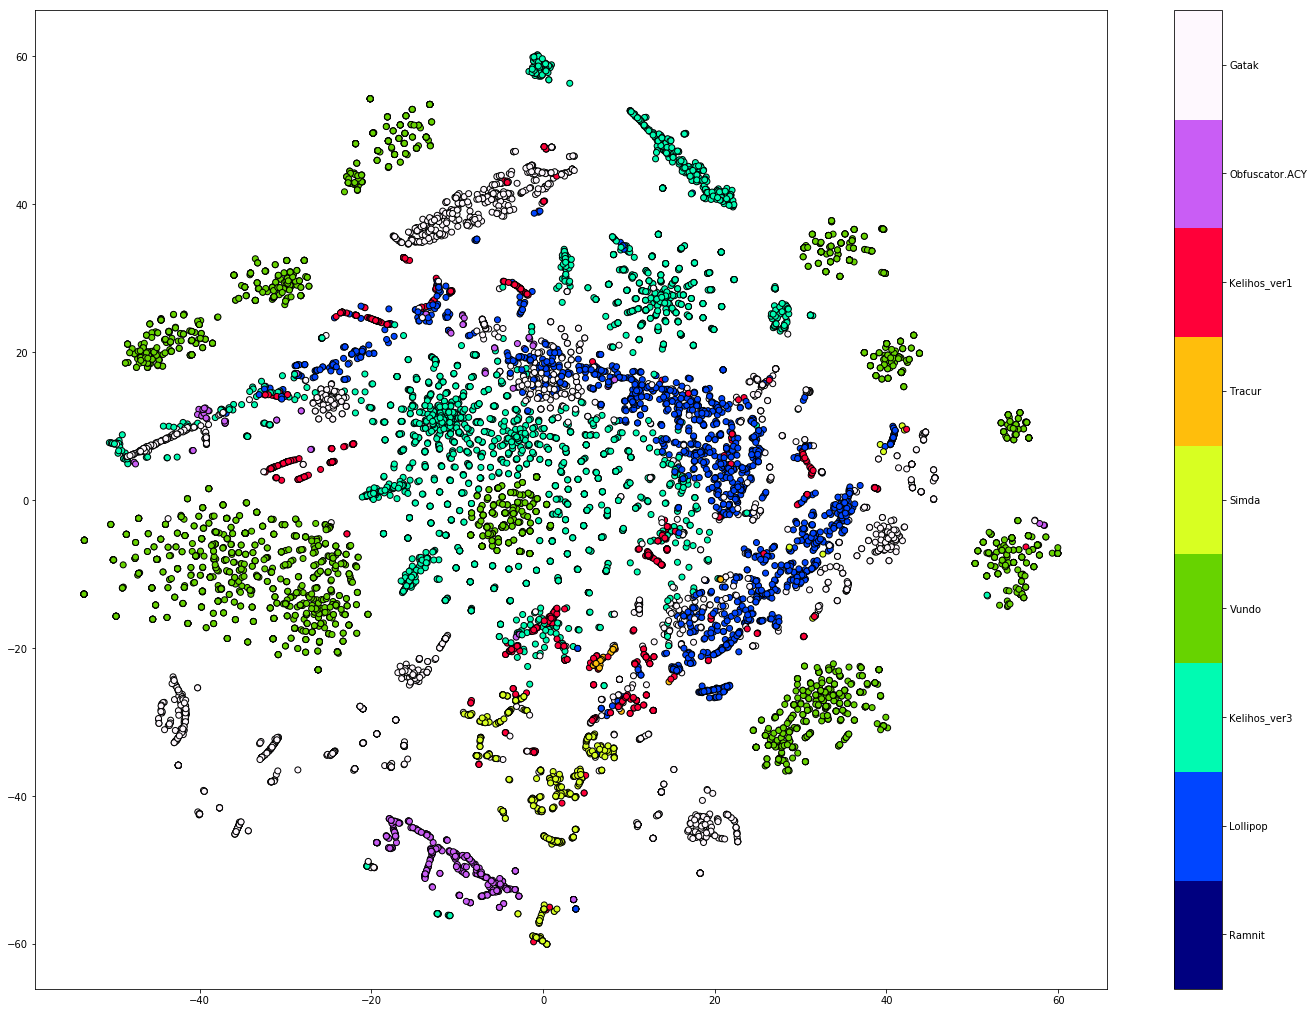

In [19]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [20]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [44]:
# Training top_model and saving min training loss weights
n_neighbors = 4
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    top_model = KNeighborsClassifier(n_neighbors, weights='distance',n_jobs=-1)
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.9386
[1] Test acurracy: 0.9156
[2] Test acurracy: 0.9384
[3] Test acurracy: 0.9439
[4] Test acurracy: 0.9457
[5] Test acurracy: 0.9392
[6] Test acurracy: 0.9227
[7] Test acurracy: 0.9494
[8] Test acurracy: 0.9252
[9] Test acurracy: 0.9455


In [45]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.9364


In [46]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


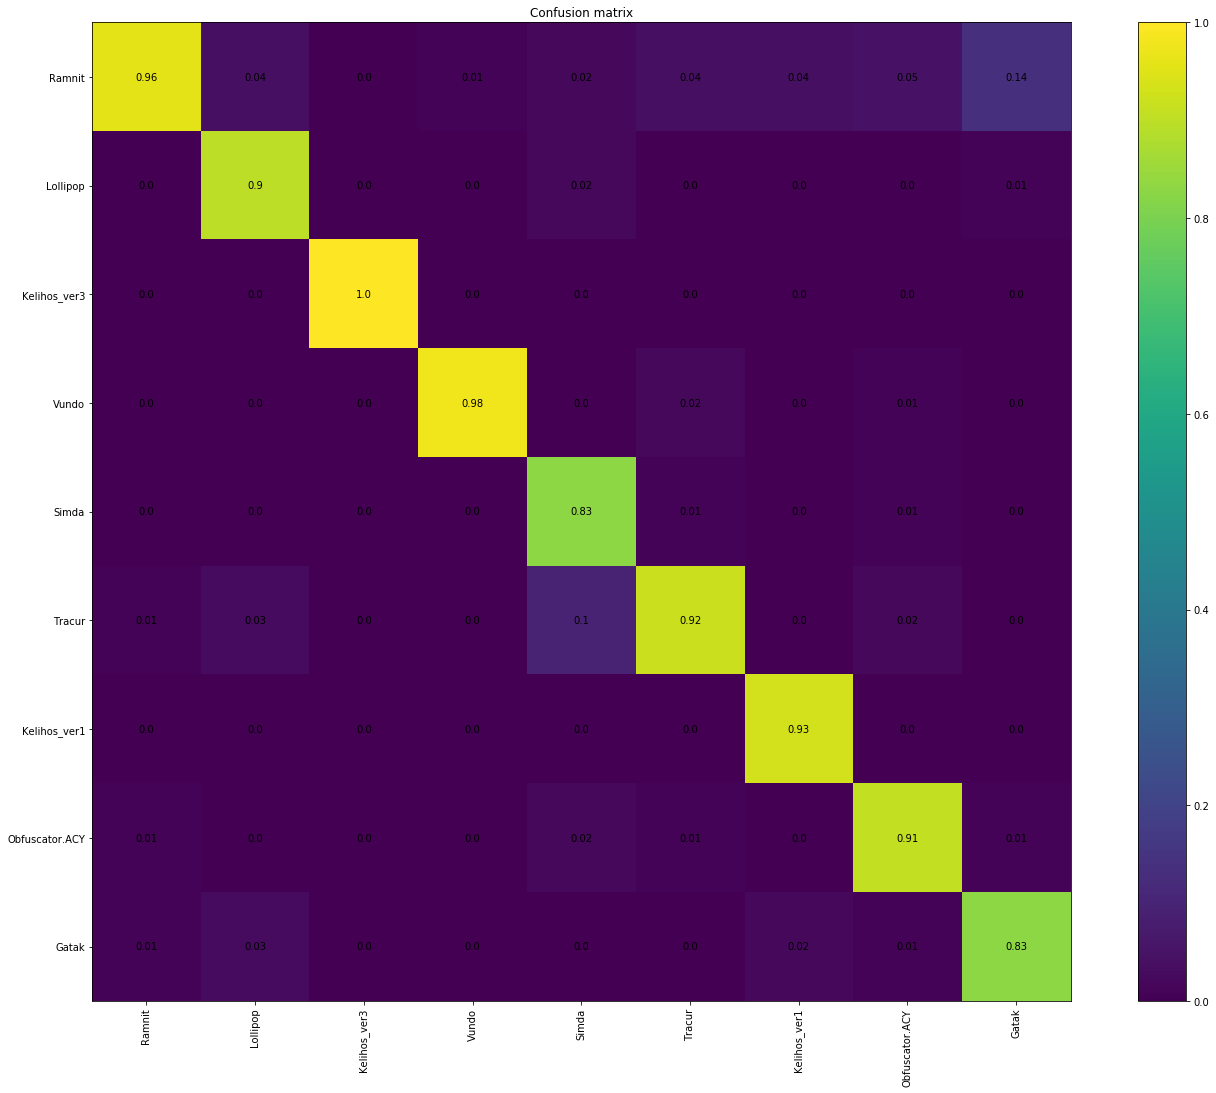

In [47]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()